DISCIPLINA: Gestão do Conhecimento	 PROFESSOR(A): Alex Salgado
PERÍODO: 7o. TURNO: noite AVALIAÇÃO:

ALUNO(A): _

GRAU: VISTO DO PROFESSOR:


# Questão 1 - valor (1,0)


*** Crie um repositório no Github e adicione este arquivo no mesmo


1.1 - Você deve escolher uma base de dados aberta que seja possível treinar um modelo de aprendizagem de máquina Supervisionado de Classificação (assim como o exemplo da Iris e Cancer). A partir desta base de dados, você vai treinar o modelo, fazer previsões e calcular a acurácia do mesmo.
Obs.: Não utilizar nenhuma base de dados usada em aula ou nos trabalhos.


In [0]:
https://github.com/BuzzFeedNews/zika-data/blob/master/data/parsed/brazil/brazil-microcephaly-2016-01-23-table-1.csv

1.2 - Após tratada, criar uma pasta no seu GoogleDrive e disponibilizar o link do arquivo de sua base (csv, xlsx, etc) para ser importado no seu código.

In [0]:
https://drive.google.com/open?id=18gmJhZVNh6GiLZQWLtnmd-JYtyS5prnk

## Criar um código usando o Jupyter Notebook e responder (através de código) às seguintes questões:


# Questão 2 - valor (1,0)

2.1 - Importar os modulos python para machine learn e carregar o arquivo 

** Sugestão se for do tipo xlsx, usar o read_excel do pandas
import pandas as pd
dt = pd.read_excel("meuarquivo.xlsx")


In [0]:
import pandas as pd
data = pd.read_csv('/content/brazil-microcephaly-2016-01-23-table-1.csv', index_col=0)



2.2 - Exibir os primeiros registros desta tabela.


In [0]:
data.head(10)

,state,cases_under_investigation,cases_confirmed,cases_discarded,cases_reported_total
no,,,,,
1,Alagoas,158,0,0,158
2,Bahia,471,35,27,533
3,Ceará,218,4,7,229
4,Maranhão,119,0,15,134
5,Paraíba,497,31,181,709
6,Pernambuco,1125,138,110,1373
7,Piauí,91,0,0,91
8,Rio Grande do Norte,133,60,15,208
9,Sergipe,172,0,0,172


2.3 - De que se trata esse banco de dados? e que tipo de previsão pode ser feito com ele?


In [0]:
#A base de dados se trata dos casos de Microcefalia causados ou com suspeita de terem sidos causados pelo Zika virus, até a data de 23/01/2016, nos estados brasileiros.
#A base traz os casos sobre investigação, casos confirmados, casos descartados e total de casos reportados.

# Questão 3 - valor (0,5)


Utilizando as terminologias de Machine Learning(features e observações):



3.1 - Quantas "features" têm nessa base de dados?

In [0]:
#A presente base possui 4 features: cases_under_investigation	cases_confirmed	cases_discarded	cases_reported_total

3.2 - Quantas observações têm nessa base de dados?


In [0]:
#Há um total de 168 registros na base.
#Essa base possui uma observação, qué a da suspeita do zika nos casos de microcefalia 

# Questão 4 - valor (1,0)


4.1 - Faça uma previsão, usando o algoritmo de LogisticRegression.


<class 'pandas.core.frame.DataFrame'>
(27, 3)
<class 'pandas.core.series.Series'>
(27,)
5.684341886080802e-14
[1. 1. 1.]
10.0


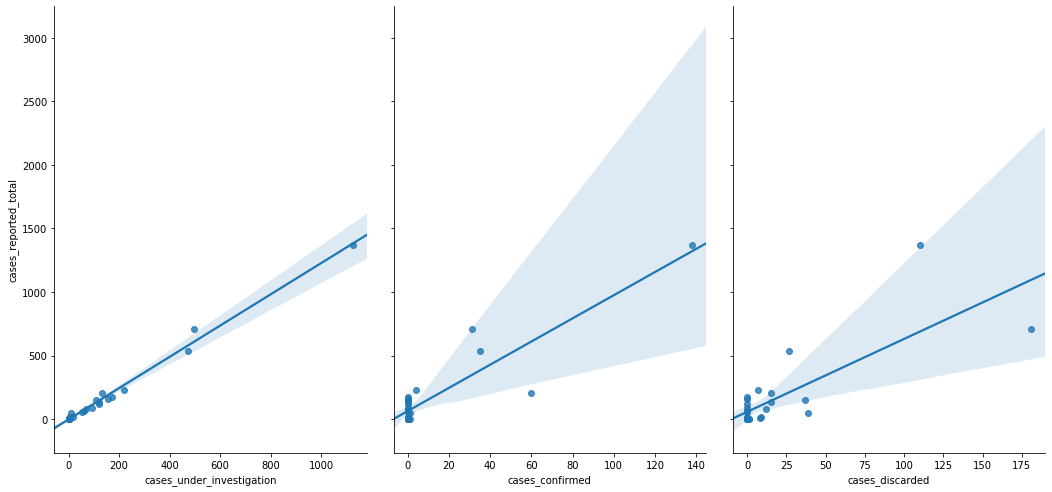

In [0]:
data.tail()
data.shape

import seaborn as sns
%matplotlib inline
sns.pairplot(data, x_vars=['cases_under_investigation', 'cases_confirmed','cases_discarded'], 
             y_vars='cases_reported_total', height=7, aspect=0.7, kind='reg')

features_cols = []
features_cols = ['cases_under_investigation', 'cases_confirmed','cases_discarded']


x = data[features_cols]

x = data[['cases_under_investigation', 'cases_confirmed','cases_discarded']]

x.head()

print (type(x))
print (x.shape)


y = data['cases_reported_total']
y = data.cases_reported_total
y.head()

print (type(y))
print (y.shape)


from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=1)


from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(x_train, y_train)
LinearRegression(fit_intercept=True, normalize=False)

print (linreg.intercept_)
print (linreg.coef_)
zip(features_cols, linreg.coef_)
y_pred = linreg.predict(x_test)

true = [100,50, 30, 20]
pred = [90, 50, 50, 30]

print ((10 + 0 + 20 + 10)/4.)

# Questão 5 - valor (1,5)


Usando o método de avaliação de acurácia (Treinar e testar na base de dados inteira/Train test entire model), Calcular a acurácia de cada um dos 3 métodos abaixo.

4.1 - Acurácia usando o algoritmo de KNN (com 1 vizinho, k=1)


In [0]:
from sklearn import metrics
#print(metrics.accuracy_score(y, y_pred))

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x, y)
y_pred = knn.predict(x)
print(metrics.accuracy_score(y, y_pred))

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x, y)
y_pred = knn.predict(x)
print(metrics.accuracy_score(y, y_pred))

#print(metrics.accuracy_score(y_test, y_pred))

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

k_range = list(range(1, 26))

scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

    
import matplotlib.pyplot as plt

%matplotlib inline


plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')


knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X, y)

knn.predict([[3, 5, 4, 2]])

from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

1.0
1.0
0.14285714285714285
0.14285714285714285


ValueError: ignored

4.2 - Acurácia usando o algoritmo de KNN (com 5 vizinho, k=5)


In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
print(knn)

knn.fit(x_train, y_train)
knn.predict(x_test)


k_range = list(range(1, 26))

scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))


import matplotlib.pyplot as plt

%matplotlib inline


plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')


from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


ValueError: ignored

4.3 - Acurácia usando o algoritmo de LogisticRegression


In [0]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(x_train, y_train)
LinearRegression(fit_intercept=True, normalize=False)

print (linreg.intercept_)
print (linreg.coef_)
zip(features_cols, linreg.coef_)
y_pred = linreg.predict(x_test)

5.684341886080802e-14
[1. 1. 1.]


4.4 - De acordo com seus resultados anteriores, qual dos 3 métodos é mais eficiente?


In [0]:
*** Envie o link do seu Github com essa resposta no Classroom
